In [1]:
# 라이브러리 추가하기
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
# webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('C:/Myexam/chromedriver/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

In [3]:
# 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# BeautifulSoup으로 tr태그 추출하기
channel_list = soup.select('tr')
print(len(channel_list),'\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [5]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [6]:
# 채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [7]:
# 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [8]:
# 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [9]:
# 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

6410만
190억1809만
371개


In [10]:
# 반복문으로 채널 정보 추출하기
for channel in channel_list:
    title =    channel.select('h1 > a')[0].text.strip() 
    category =    channel.select('p.category')[0].text.strip() 
    subscriber =    channel.select('.subscriber_cnt')[0].text 
    view =    channel.select('.view_cnt')[0].text
    video =    channel.select('.video_cnt')[0].text 
    data =  [title, category, subscriber, view, video] 

In [11]:
# 페이지별 url 만들기
page = 1
url =    'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page) 
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [19]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title =    channel.select('h1 > a')[0].text.strip() 
        category =    channel.select('p.category')[0].text.strip() 
        subscriber =    channel.select('.subscriber_cnt')[0].text 
        view =    channel.select('.view_cnt')[0].text
        video =    channel.select('.video_cnt')[0].text 
        data =  [title, category, subscriber, view, video] 
        results.append(data)

In [20]:
# 데이터 컬럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index= False)

In [21]:
# 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리) 
from matplotlib import font_manager, rc
import    platform
if    platform.system() ==    'Windows':
    path =    'c:/Windows/Fonts/malgun.ttf'
    font_name =    font_manager.FontProperties(fname =    path).get_name()
    rc('font', family =    font_name)
elif    platform.system() ==    'Darwin':
    rc('font', family =    'AppleGothic')
else:
    print('Check your OS system')

In [23]:
# 엑셀 파일 불러오기
df =    pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개"
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [24]:
# 데이터 살펴보기
df['subscriber'][0:10]

0    6410만
1    6040만
2    5650만
3    2850만
4    2650만
5    2420만
6    2330만
7    2160만
8    1930만
9    1840만
Name: subscriber, dtype: object

In [25]:
# 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    64100000
1    60400000
2    56500000
3    28500000
4    26500000
5    24200000
6    23300000
7    21600000
8    19300000
9    18400000
Name: subscriber, dtype: object

In [26]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] =    df['subscriber'].str.replace('만', '0000') 
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개,64100000
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개,60400000
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개",56500000
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개",28500000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [27]:
# 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [28]:
# Series 데이터 타입 변환하기
df['replaced_subscriber'] =    df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [29]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df =    df.pivot_table(index =    'category', values =    'replaced_subscriber', aggfunc =  ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],97640000,71
[IT/기술/컴퓨터],7960000,8
[TV/방송],229930000,146
[게임],67190000,74
[교육/강의],23450000,22


In [30]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns =  ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],97640000,71
[IT/기술/컴퓨터],7960000,8
[TV/방송],229930000,146
[게임],67190000,74
[교육/강의],23450000,22


In [31]:
# 데이터프레임의인덱스초기화하기
pivot_df =    pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],97640000,71
1,[IT/기술/컴퓨터],7960000,8
2,[TV/방송],229930000,146
3,[게임],67190000,74
4,[교육/강의],23450000,22


In [32]:
# 데이터프레임을내림차순정렬하기
pivot_df =    pivot_df.sort_values(by= 'subscriber_sum', ascending= False )
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],674990000,171
17,[키즈/어린이],257850000,88
2,[TV/방송],229930000,146
11,[음식/요리/레시피],180710000,85
7,[미분류],143680000,114


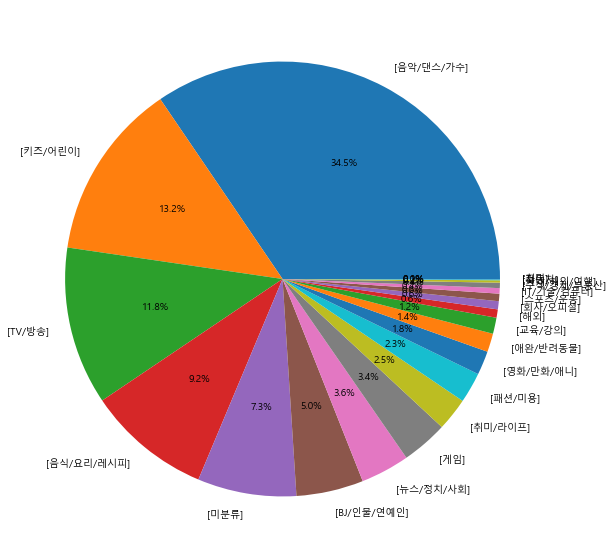

In [33]:
# 카테고리별구독자수시각화하기
plt.figure(figsize =  (30,10))
plt.pie(pivot_df['subscriber_sum'], labels= pivot_df['category'], autopct= '%1.1f%%')
plt.show()

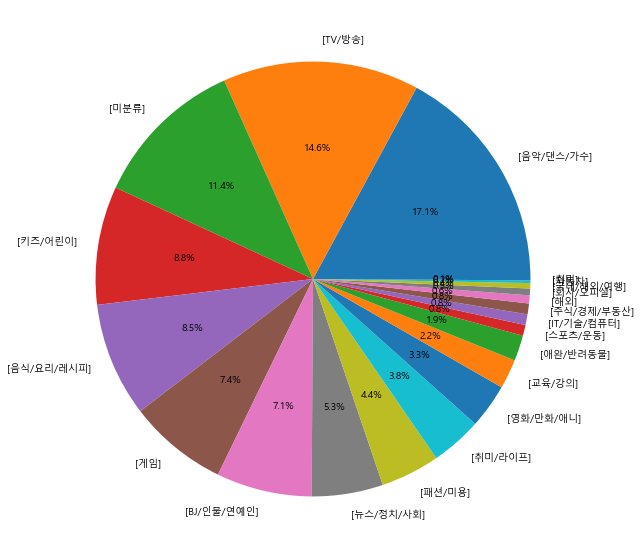

In [34]:
# 카테고리별 채널 수 시각화하기
pivot_df =    pivot_df.sort_values(by= 'category_count', ascending= False)
pivot_df.head()
plt.figure(figsize =  (30,10))
plt.pie(pivot_df['category_count'], labels= pivot_df['category'], autopct= '%1.1f%%')
plt.show()